In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import gc
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from tqdm import tqdm_notebook

In [ ]:
# Set the seed value all over the place to make this reproducible.
def seed_all(SEED=42):
  random.seed(SEED)
  np.random.seed(SEED)
  os.environ['PYTHONHASHSEED'] = str(SEED)
seed_all()

##Joining Data

In [ ]:
train = pd.read_csv("/content/train_mean_fe.csv")
test  = pd.read_csv("/content/test_mean_fe.csv")

In [ ]:
chips_map_train=pd.read_csv("/content/chips_mapping_train.csv")

In [ ]:
train=pd.merge(train,chips_map_train,on='field_id')

In [ ]:
train_geo=pd.read_csv("/content/train_geo.csv")

In [ ]:
for x in train.chip.unique():
  if(x not in train_geo.chip.unique()):
    train_geo.loc[len(train_geo.index)] = [x, np.nan] 


In [ ]:
train=pd.merge(train,train_geo,on='chip')

In [ ]:
field_geo=pd.read_csv("/content/fields_geo_train.csv")

In [ ]:
train=pd.merge(train,field_geo,on='field_id')

In [ ]:
pixels=pd.read_csv("/content/train_pixels.csv")

In [ ]:
train=pd.merge(train,pixels,on='field_id')

In [ ]:
components=pd.read_csv("/content/train_components.csv")

In [ ]:
train=pd.merge(train,components,on='field_id')

In [ ]:
components=pd.read_csv("/content/test_components.csv")

In [ ]:
test=pd.merge(test,components,on='field_id')

In [ ]:
pixels=pd.read_csv("/content/test_pixels.csv")

In [ ]:
test=pd.merge(test,pixels,on='field_id')

In [ ]:
chips_map_test=pd.read_csv("/content/chips_mapping_test.csv")

In [ ]:
test=pd.merge(test,chips_map_test,on='field_id')

In [ ]:
test_geo=pd.read_csv("/content/test_geo.csv")

In [ ]:
for x in test.chip.unique():
  if(x not in test_geo.chip.unique()):
    test_geo.loc[len(test_geo.index)] = [x, np.nan] 

In [ ]:
test=pd.merge(test,test_geo,on='chip')

In [ ]:
field_geo=pd.read_csv("/content/fields_geo_test.csv")

In [ ]:
test=pd.merge(test,field_geo,on='field_id')

In [ ]:
df = pd.concat([train, test]).reset_index(drop=True)

In [ ]:
df.shape

(7081, 109)

In [ ]:
df

,field_id,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12,SARVI2,SAVI3,SAVI,SBL,SC,SLAVI,ATSAVI,AFRI1600,AFRI1200,Alteration,ARI,AVI,ARVI,ARVI2,BDWDRVI,BRI,CCCI,CARI,CARI2,Chlgreen,Chgreen,Clrededge,Chlrededge,CVI,CI,CTI,Datt1,Datt4,Datt6,GDVI,DVIMSS,EVI,EVI2,EVI22,Fe2+,Fe3+,FO,FI,FS,GEMI,GVMI,GARI,GLI,GBNDVI,GRNDVI,Hue,I,Latirite,LCI,logR,r,Maccioni,McRIG,MVI,MGVI,MNSI,MSBI,MYVI,mARI,mCARI,mNDVI,NLI,NORM_G,NORM_NIR,NORM_R,PPR,PVR,SIWSI,NDVI,BNDVI,REP,Rre,IF,BGI,RENDVI,FIDET,RATIO2,Ratio3,Ratio4,Ratio5,Ratio6,Ratio7,Ratio8,Ratio9,S2REP,RESR,MI,crop_id,chip,bbox,top_left_x,top_left_y,down_right_x,down_right_y,nbr_pixels,component
0,1,45.000000,42.444444,42.722222,48.000000,49.666667,58.000000,65.222222,60.277778,71.944444,12.000000,80.277778,61.333333,1.024722,0.169292,0.150340,-103.200000,0.142394,0.551333,0.016904,59.809916,59.953634,1.309101,0.003274,-24.000000,0.117834,-0.047342,-0.751306,0.000054,0.850027,99.624472,66.518980,0.655131,0.410934,0.213792,0.761600,0.066731,0.115442,0.747047,0.862374,1.916141,2.908613,17.555556,-19.200000,1.024722,0.269627,0.173940,1.908305,1.123463,1.332427,1.908305,0.764035,-136.511459,-0.008096,0.521027,-0.028416,1.589345,1.494350,0.102323,4.366120,1.309101,0.097825,0.227753,1.255874,0.905103,0.009178,0.149491,-4.516778,-4.758222,86.471222,10.844167,0.197142,14.244313,0.681253,0.973905,0.282966,0.399171,0.317863,2.892441,2.764679,1.627160,0.357557,0.173493,733.339947,56.611111,NaN,1.053559,0.077409,0.655534,0.906242,28.000000,3.750000,179.777778,1.359298,1.053559,5.995370,1.124509,2680.361772,0.125559,1.627160,1.0,92039,"[82.29275858265439, 27.234713779563087, 82.318...",82.295105,27.255234,82.294901,27.255508,18,9329
1,2,45.000000,42.000000,42.166667,47.666667,49.250000,59.916667,69.000000,63.916667,76.333333,12.833333,79.916667,56.750000,1.268056,0.217923,0.193519,-101.566667,0.111142,0.613069,0.055910,63.464582,63.620252,1.409631,0.003409,-22.000000,0.153590,-0.009256,-0.735783,0.000053,0.894888,98.698509,65.890098,0.611218,0.516696,0.298916,0.713945,0.058953,0.117921,0.748936,0.906587,0.448729,0.718754,21.750000,-16.866667,1.268056,0.347125,0.227369,1.773349,1.130073,1.250473,1.773349,0.709872,-248.997094,0.060381,0.587865,-0.030592,1.592323,1.497322,0.224903,4.322404,1.409631,0.131570,0.294108,1.343173,0.928386,0.005561,0.160657,-2.656917,-5.302583,87.484417,10.804667,0.217780,0.214106,0.767494,0.976926,0.274236,0.415853,0.309911,2.904644,2.791695,1.615816,2.062536,0.206949,734.030174,58.333333,NaN,1.067790,0.097859,0.276726,0.914402,65.500000,3.509615,181.000000,1.449993,1.067790,5.952991,1.151660,2741.995183,0.141470,1.615816,1.0,7e392,"[82.31860826863934, 27.234467994552023, 82.344...",82.323507,27.234833,82.323507,27.234924,12,12306
2,3,45.000000,42.687500,43.500000,49.187500,51.437500,62.875000,71.625000,66.625000,79.312500,13.000000,82.125000,58.062500,1.325858,0.226337,0.200982,-105.050000,0.103965,0.623316,0.062548,66.176502,66.332392,1.416588,0.003543,-23.187500,0.147666,-0.002689,-0.729875,0.000053,0.867416,103.643654,69.096936,0.607275,0.533434,0.297279,0.717986,0.059188,0.129228,0.748501,0.882754,0.346054,0.559439,23.125000,-17.987500,1.325858,0.360578,0.237255,1.757889,1.129451,1.232650,1.757889,0.706441,-294.202318,0.069989,0.566211,-0.026975,1.548327,1.446119,0.328710,4.438525,1.416588,0.131678,0.305855,1.361214,0.907339,0.028253,0.158490,-2.306250,-6.190188,90.886875,11.423812,0.236155,16.460528,0.713032,0.978076,0.273030,0.418586,0.308383,1.811658,2.710238,1.161629,1.986158,0.219050,731.633117,60.406250,NaN,1.036020,0.100466,14.089844,0.876579,73.000000,3.461538,157.812500,1.463396,1.036020,6.100962,1.139261,2814.622971,0.164884,1.161629,1.0,7e392,"[82.31860826863934, 27.234467994552023, 82.344...",82.319425,27.243316,82.319425,27.243499,16,12307
3,91,43.000000,38.545455,37.545455,36.272727,40.045455,59.000000,69.636364,65.136364,75.727273,12.000000,61.954545,39.045455,NaN,0.424342,0.376878,-75.054545,1.616986,0.866321,0.218999,64.750489,64.911744,1.588142,0.001667,-12.

##Feature Engineering

In [ ]:
df['x1']=(df['bbox'].apply(lambda x:x if (isinstance(x,int) or isinstance(x,float)) else x.split(',')[0][1:])).astype(float)
df['y1']=(df['bbox'].apply(lambda x:x if (isinstance(x,int) or isinstance(x,float)) else x.split(',')[1])).astype(float)
df['x2']=(df['bbox'].apply(lambda x:x if (isinstance(x,int) or isinstance(x,float)) else x.split(',')[2])).astype(float)
df['y2']=(df['bbox'].apply(lambda x:x if (isinstance(x,int) or isinstance(x,float)) else x.split(',')[-1][:-1])).astype(float)

For the field that fall across multiple chips,i will create a new chip the union of the corresponding chips

In [ ]:
l=set()
for x in df.chip.values:
  if('+' in x):
    l.add(x)

In [ ]:
D=dict(zip(df.chip.values,tuple(x for x in zip(df.x2.values,df.y1.values,df.x1.values,df.y2.values))))

In [ ]:
d=dict()
for chip in l:
  chips=chip.split('+')
  start=False
  for idx in chips:
    try:
      x,y,z,a=D[idx]
    except:
      continue
    if(start):
      x2,y1,x1,y2=d[chip]
      d[chip]=(max(x2,x),min(y1,y),min(x1,z),max(a,y2))
    else:
      d[chip]=(x,y,z,a)

In [ ]:
df['x2']=df['chip'].apply(lambda x: d[x][0] if x in d.keys() else D[x][0])
df['y1']=df['chip'].apply(lambda x: d[x][1] if x in d.keys() else D[x][1])
df['x1']=df['chip'].apply(lambda x: d[x][2] if x in d.keys() else D[x][2])
df['y2']=df['chip'].apply(lambda x: d[x][-1] if x in d.keys() else D[x][-1])

clustering

In [ ]:
features=df.columns.difference(['crop_id','field_id','chip','bbox']).tolist()
df[features]=df[features].fillna(-9999).replace([np.inf, -np.inf], -9999)

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=125,random_state=11)
kmeans.fit(df[features])

KMeans(n_clusters=125, random_state=11)

In [ ]:
df['cluster']=kmeans.labels_

In [ ]:
df['reacher1']=df['B09'] * df['B02'] / np.power(df['B01'], 2.0)
df['reacher2']=df['B11'] * df['B05'] / np.power(df['B04'], 2.0)
df['reacher3']=df['B12'] * df['B08'] / np.power(df['B03'], 2.0)

In [ ]:
def Polar(X,y, a = 0, b = 0): 
    r = np.sqrt((X-a)**2 + (y-b)**2)
    phi = np.arctan2((y-a), (X-b))
    return r, phi

In [ ]:
def AggChip(feature):
  deviceMean =dict(df.groupby('chip')[feature].mean())
  deviceStd = dict(df.groupby('chip')[feature].std())
  deviceMin = dict(df.groupby('chip')[feature].min())
  deviceMax = dict(df.groupby('chip')[feature].max())
  deviceMedian = dict(df.groupby('chip')[feature].median())
  deviceUnique=dict(df.groupby('chip')[feature].nunique())

  df[f'{feature}_chipUnique'] =df['chip'].map(deviceUnique)

  df[f'{feature}_chipMean'] =df['chip'].map(deviceMean)
  df[f'{feature}_chipMean_diff'] =df[f'{feature}']-df[f'{feature}_chipMean']

  df[f'{feature}_chipMedian'] =df['chip'].map(deviceMedian)
  df[f'{feature}_chipMedian_diff'] =df[f'{feature}']-df[f'{feature}_chipMedian']

  df[f'{feature}_chipStd'] = df['chip'].map(deviceStd)
  df[f'{feature}_chipStd_diff'] =df[f'{feature}']-df[f'{feature}_chipStd']

  df[f'{feature}_chipMin'] = df['chip'].map(deviceMin)
  df[f'{feature}_chipMin_diff'] =df[f'{feature}']-df[f'{feature}_chipMin']

  df[f'{feature}_chipMax'] = df['chip'].map(deviceMax)
  df[f'{feature}_chipMax_diff'] =df[f'{feature}']-df[f'{feature}_chipMax']



In [ ]:
features=df.columns.difference(['field_id','crop_id','chip','cluster','y','bbox','top_left_x',	'top_left_y',	'down_right_x',	'down_right_y','istest','top_class_in_chip','nbr_pixels','x1','x2','y1','y2']).tolist()

In [ ]:
to_remove=['AFRI1200',
 'NORM_NIR',
 'GDVI_max',
 'GARI_max',
 'FS_min',
 'MSBI',
 'EVI22',
 'B07',
 'B01_min',
 'MGVI_max',
 'B04_min',
 'B03_max',
 'LCI_median',
 'SLAVI_max',
 'B04_max',
 'S2REP_median',
 'AFRI1600',
 'AVI_median',
 'B05_max',
 'B09_max',
 'AVI_max',
 'B09_min',
 'B04_median',
 'BNDVI_min',
 'B08_max',
 'Rre_max',
 'SBL',
 'SAVI_std',
 'AFRI1600_std',
 'Hue_min',
 'B8A_median',
 'B03_min',
 'LCI',
 'ATSAVI_min',
 'SLAVI_median',
 'ARVI2',
 'B02_median',
 'Rre_min',
 'B05_median',
 'EVI22_min',
 'B01_median',
 'EVI22_median',
 'EVI2_min',
 'ATSAVI_median',
 'IF_max',
 'B07_median',
 'ATSAVI',
 'B03_median',
 'logR_median',
 'EVI2_max',
 'SLAVI',
 'r',
 'GDVI_min',
 'SAVI3_std',
 'EVI22_max',
 'SAVI_min',
 'Ratio7_max',
 'EVI2_median',
 'Fe2+',
 'Fe2+_max',
 'Fe2+_median',
 'Fe2+_min',
 'Fe2+_std',
 'Ratio7_std',
 'Ratio7_min',
 'Ratio7_median',
 'Ratio7',
 'ATSAVI_max',
 'Latirite',
 'Latirite_max',
 'Latirite_median',
 'Latirite_min',
 'Latirite_std',
 'r_max',
 'r_median',
 'r_min',
 'logR_min',
 'logR_max',
 'SAVI_max',
 'logR',
 'B09_median',
 'SAVI3_min',
 'B08_min',
 'B08_median',
 'SAVI3_median',
 'SAVI3_max',
 'SAVI3',
 'SIWSI',
 'SIWSI_max',
 'SIWSI_median',
 'SIWSI_min',
 'SIWSI_std',
 'SAVI',
 'SARVI2_std',
 'SARVI2_min',
 'SARVI2_median',
 'SARVI2_max',
 'SARVI2',
 'EVI2',
 'SAVI_median']

In [ ]:
feats=[c for c in features if c not in to_remove]

In [ ]:
df['R1'], df['Phi1'] = Polar(df["x1"],df["y2"])
df['R2'], df['Phi2'] = Polar(df["x2"],df["y1"])
df['filed_R1'], df['field_Phi1'] = Polar(df["top_left_x"],df["top_left_y"])
df['field_R2'], df['field_Phi2'] = Polar(df["down_right_x"],df["down_right_y"])
df['field_Rdiff']=df['filed_R1']-df['field_R2']
df['field_Phidiff']=df['field_Phi1']-df['field_Phi2']

In [ ]:
df['chip_height']=df['x2']-df['x1']
df['chip_widht']=df['y1']-df['y2']
df['chip_area']=df['chip_height']*df['chip_widht']

In [ ]:
df['chip_height']=df['x2']-df['x1']
df['chip_widht']=df['y1']-df['y2']
df['chip_area']=df['chip_height']*df['chip_widht']

In [ ]:
df['xdiv']=df['x1']/df['x2']
df['ydiv']=df['y1']/df['y2']
df['xydiv']=df['xdiv']*df['ydiv']

In [ ]:
df['field_height']=df['top_left_x']-df['down_right_x']
df['field_widht']=df['down_right_y']-df['top_left_x']
df['field_area']=(df['field_height'].apply(lambda x:max(x,1)))*(df['field_widht'].apply(lambda x:max(x,1)))

In [ ]:
df['field/chip_area']=df['field_area']/df['chip_area']

In [ ]:
df['pixel_ratio']=df['nbr_pixels']/256

In [ ]:
feats.extend(['field_area'])

In [ ]:
feats.extend(['field_Phi1','field_Phi2','filed_R1','field_R2','field_Phidiff'])

In [ ]:
##new
feats.extend(['field_height','field_widht'])

In [ ]:
for x in feats:
  AggChip(x)

In [ ]:
fq = df.groupby('chip').size()/len(df)

In [ ]:
df['chipFreq']=df['chip'].map(fq)

In [ ]:
df['is_overlapping']=df['chip'].apply(lambda x :x.count('+'))

In [ ]:
df['Rdiff']=df['R1']-df['R2']
df['Phidiff']=df['Phi1']-df['Phi2']

In [ ]:
df.shape

(7081, 1132)

In [ ]:
df=pd.get_dummies(df, columns = ['chip'])

In [ ]:
df.shape

(7081, 2520)

In [ ]:
train=df[df['crop_id'].isnull()==False].copy()
test=df[df['crop_id'].isnull()==True].copy()

In [ ]:
features=train.columns.difference(['crop_id','field_id','bbox','istest']).tolist()

In [ ]:
len(features)

2517

In [ ]:
d={1.: 0,
 2.: 1,
 3.: 2,
 4.: 3,
 6.: 4,
 8.: 5,
 15.: 6,
 5.: 7,
 16.: 8,
 14.: 9,
 13.: 10,
 9.: 11,
 36.: 12}

In [ ]:
train['crop_id']=train['crop_id'].map(d)

In [ ]:
train = train.fillna(-9999).replace([np.inf, -np.inf], -9999)
test = test.fillna(-9999).replace([np.inf, -np.inf], -9999)

##Modelling

To deal with the high dimension we will use low feature fraction(percentage of feature used when building each tree) and for the imbalance problem we will use balanced cross entropy as loss function (setting class weights in lgbm)

In [ ]:


lgbm_params = {
    'n_estimators': 3000,
    'learning_rate': 0.07,
   # 'colsample_bytree': 0.6,
    'subsample': 0.35,
    'reg_alpha': 10.5,
    'max_depth':18,
    'feature_fraction':0.15,
    'reg_lambda': 8.5,
    'num_leaves': 80,
    'min_data_in_leaf':120,
    'boosting': 'gbdt',
    'num_class':13,
    'class_weight':{0: 0.2102412604628262,
 1: 0.4313131313131313,
 2: 4.145631067961165,
 3: 0.26020719073735527,
 4: 2.6196319018404908,
 5: 8.895833333333334,
 6: 10.414634146341463,
 7: 18.565217391304348,
 8: 26.6875,
 9: 30.5,
 10: 7.237288135593221,
 11: 1.4573378839590443,
 12: 3.310077519379845}
  
}

In [ ]:
from lightgbm import LGBMClassifier
# Select X and y features
X =train[features]
y = train['crop_id']
tess =test[features]

# Stratified Validation
folds = StratifiedKFold(n_splits = 5,shuffle=True,random_state=222)

# Dataframe to store feature importance
feature_importance_df = pd.DataFrame()

# Lists to store predictions and losses
predictions = []
losses = []
for i,( train_index, test_index) in enumerate(folds.split(X, y)):
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  # Instantiate model
  model =LGBMClassifier(**lgbm_params)
  model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],verbose=200, early_stopping_rounds = 150)
  # Make predictions
  preds = model.predict_proba(tess,num_iteration=model.best_iteration_)
 
  y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)

  # Append predictions and losses
  predictions.append(preds)
  loss = log_loss(y_test, y_pred)

  # Print loss
  print(f'\n {i+1}:  {loss}\n')
  losses.append(loss)

print(f'Mean Loss: {np.mean(losses)}')

Training until validation scores don't improve for 150 rounds.
[200]	training's multi_logloss: 0.391053	valid_1's multi_logloss: 1.16268
[400]	training's multi_logloss: 0.377561	valid_1's multi_logloss: 1.14565
[600]	training's multi_logloss: 0.377435	valid_1's multi_logloss: 1.1455
[800]	training's multi_logloss: 0.377422	valid_1's multi_logloss: 1.14543
[1000]	training's multi_logloss: 0.37742	valid_1's multi_logloss: 1.14542
[1200]	training's multi_logloss: 0.377418	valid_1's multi_logloss: 1.1454
[1400]	training's multi_logloss: 0.377418	valid_1's multi_logloss: 1.1454
[1600]	training's multi_logloss: 0.377418	valid_1's multi_logloss: 1.1454
[1800]	training's multi_logloss: 0.377417	valid_1's multi_logloss: 1.1454
[2000]	training's multi_logloss: 0.377417	valid_1's multi_logloss: 1.1454
[2200]	training's multi_logloss: 0.377417	valid_1's multi_logloss: 1.1454
[2400]	training's multi_logloss: 0.377417	valid_1's multi_logloss: 1.1454
[2600]	training's multi_logloss: 0.377417	valid_1'

LGBMClassifier(boosting='gbdt',
               class_weight={0: 0.2102412604628262, 1: 0.4313131313131313,
                             2: 4.145631067961165, 3: 0.26020719073735527,
                             4: 2.6196319018404908, 5: 8.895833333333334,
                             6: 10.414634146341463, 7: 18.565217391304348,
                             8: 26.6875, 9: 30.5, 10: 7.237288135593221,
                             11: 1.4573378839590443, 12: 3.310077519379845},
               feature_fraction=0.15, learning_rate=0.07, max_depth=18,
               min_data_in_leaf=120, n_estimators=3000, num_class=13,
               num_leaves=80, reg_alpha=10.5, reg_lambda=8.5, subsample=0.35)


 1:  1.145399616125296

Training until validation scores don't improve for 150 rounds.
[200]	training's multi_logloss: 0.385288	valid_1's multi_logloss: 1.16629
[400]	training's multi_logloss: 0.374184	valid_1's multi_logloss: 1.15373
[600]	training's multi_logloss: 0.37397	valid_1's multi_logloss: 1.15348
[800]	training's multi_logloss: 0.373895	valid_1's multi_logloss: 1.15322
[1000]	training's multi_logloss: 0.373887	valid_1's multi_logloss: 1.15318
[1200]	training's multi_logloss: 0.373874	valid_1's multi_logloss: 1.15314
[1400]	training's multi_logloss: 0.373872	valid_1's multi_logloss: 1.15312
[1600]	training's multi_logloss: 0.373872	valid_1's multi_logloss: 1.15312
[1800]	training's multi_logloss: 0.373871	valid_1's multi_logloss: 1.15312
[2000]	training's multi_logloss: 0.373871	valid_1's multi_logloss: 1.15312
[2200]	training's multi_logloss: 0.373871	valid_1's multi_logloss: 1.15312
[2400]	training's multi_logloss: 0.373871	valid_1's multi_logloss: 1.15312
[2600]	training's

LGBMClassifier(boosting='gbdt',
               class_weight={0: 0.2102412604628262, 1: 0.4313131313131313,
                             2: 4.145631067961165, 3: 0.26020719073735527,
                             4: 2.6196319018404908, 5: 8.895833333333334,
                             6: 10.414634146341463, 7: 18.565217391304348,
                             8: 26.6875, 9: 30.5, 10: 7.237288135593221,
                             11: 1.4573378839590443, 12: 3.310077519379845},
               feature_fraction=0.15, learning_rate=0.07, max_depth=18,
               min_data_in_leaf=120, n_estimators=3000, num_class=13,
               num_leaves=80, reg_alpha=10.5, reg_lambda=8.5, subsample=0.35)


 2:  1.1531151468148788

Training until validation scores don't improve for 150 rounds.
[200]	training's multi_logloss: 0.386256	valid_1's multi_logloss: 1.17182
[400]	training's multi_logloss: 0.373077	valid_1's multi_logloss: 1.15514
[600]	training's multi_logloss: 0.372971	valid_1's multi_logloss: 1.15488
[800]	training's multi_logloss: 0.372895	valid_1's multi_logloss: 1.15483
Early stopping, best iteration is:
[746]	training's multi_logloss: 0.372922	valid_1's multi_logloss: 1.15479


LGBMClassifier(boosting='gbdt',
               class_weight={0: 0.2102412604628262, 1: 0.4313131313131313,
                             2: 4.145631067961165, 3: 0.26020719073735527,
                             4: 2.6196319018404908, 5: 8.895833333333334,
                             6: 10.414634146341463, 7: 18.565217391304348,
                             8: 26.6875, 9: 30.5, 10: 7.237288135593221,
                             11: 1.4573378839590443, 12: 3.310077519379845},
               feature_fraction=0.15, learning_rate=0.07, max_depth=18,
               min_data_in_leaf=120, n_estimators=3000, num_class=13,
               num_leaves=80, reg_alpha=10.5, reg_lambda=8.5, subsample=0.35)


 3:  1.1548078854664532

Training until validation scores don't improve for 150 rounds.
[200]	training's multi_logloss: 0.382627	valid_1's multi_logloss: 1.19534
[400]	training's multi_logloss: 0.37142	valid_1's multi_logloss: 1.18229
[600]	training's multi_logloss: 0.371199	valid_1's multi_logloss: 1.1822
[800]	training's multi_logloss: 0.371143	valid_1's multi_logloss: 1.18211
Early stopping, best iteration is:
[794]	training's multi_logloss: 0.371147	valid_1's multi_logloss: 1.18209


LGBMClassifier(boosting='gbdt',
               class_weight={0: 0.2102412604628262, 1: 0.4313131313131313,
                             2: 4.145631067961165, 3: 0.26020719073735527,
                             4: 2.6196319018404908, 5: 8.895833333333334,
                             6: 10.414634146341463, 7: 18.565217391304348,
                             8: 26.6875, 9: 30.5, 10: 7.237288135593221,
                             11: 1.4573378839590443, 12: 3.310077519379845},
               feature_fraction=0.15, learning_rate=0.07, max_depth=18,
               min_data_in_leaf=120, n_estimators=3000, num_class=13,
               num_leaves=80, reg_alpha=10.5, reg_lambda=8.5, subsample=0.35)


 4:  1.182132567608199

Training until validation scores don't improve for 150 rounds.
[200]	training's multi_logloss: 0.382792	valid_1's multi_logloss: 1.17025
[400]	training's multi_logloss: 0.369906	valid_1's multi_logloss: 1.15311
[600]	training's multi_logloss: 0.369812	valid_1's multi_logloss: 1.15295
[800]	training's multi_logloss: 0.3698	valid_1's multi_logloss: 1.15286
[1000]	training's multi_logloss: 0.369763	valid_1's multi_logloss: 1.15275
[1200]	training's multi_logloss: 0.369715	valid_1's multi_logloss: 1.1527
[1400]	training's multi_logloss: 0.369713	valid_1's multi_logloss: 1.15268
[1600]	training's multi_logloss: 0.369712	valid_1's multi_logloss: 1.15267
[1800]	training's multi_logloss: 0.369712	valid_1's multi_logloss: 1.15266
[2000]	training's multi_logloss: 0.369711	valid_1's multi_logloss: 1.15266
[2200]	training's multi_logloss: 0.369711	valid_1's multi_logloss: 1.15266
[2400]	training's multi_logloss: 0.369711	valid_1's multi_logloss: 1.15266
[2600]	training's m

LGBMClassifier(boosting='gbdt',
               class_weight={0: 0.2102412604628262, 1: 0.4313131313131313,
                             2: 4.145631067961165, 3: 0.26020719073735527,
                             4: 2.6196319018404908, 5: 8.895833333333334,
                             6: 10.414634146341463, 7: 18.565217391304348,
                             8: 26.6875, 9: 30.5, 10: 7.237288135593221,
                             11: 1.4573378839590443, 12: 3.310077519379845},
               feature_fraction=0.15, learning_rate=0.07, max_depth=18,
               min_data_in_leaf=120, n_estimators=3000, num_class=13,
               num_leaves=80, reg_alpha=10.5, reg_lambda=8.5, subsample=0.35)


 5:  1.1526596290903595

Mean Loss: 1.1576229690210371


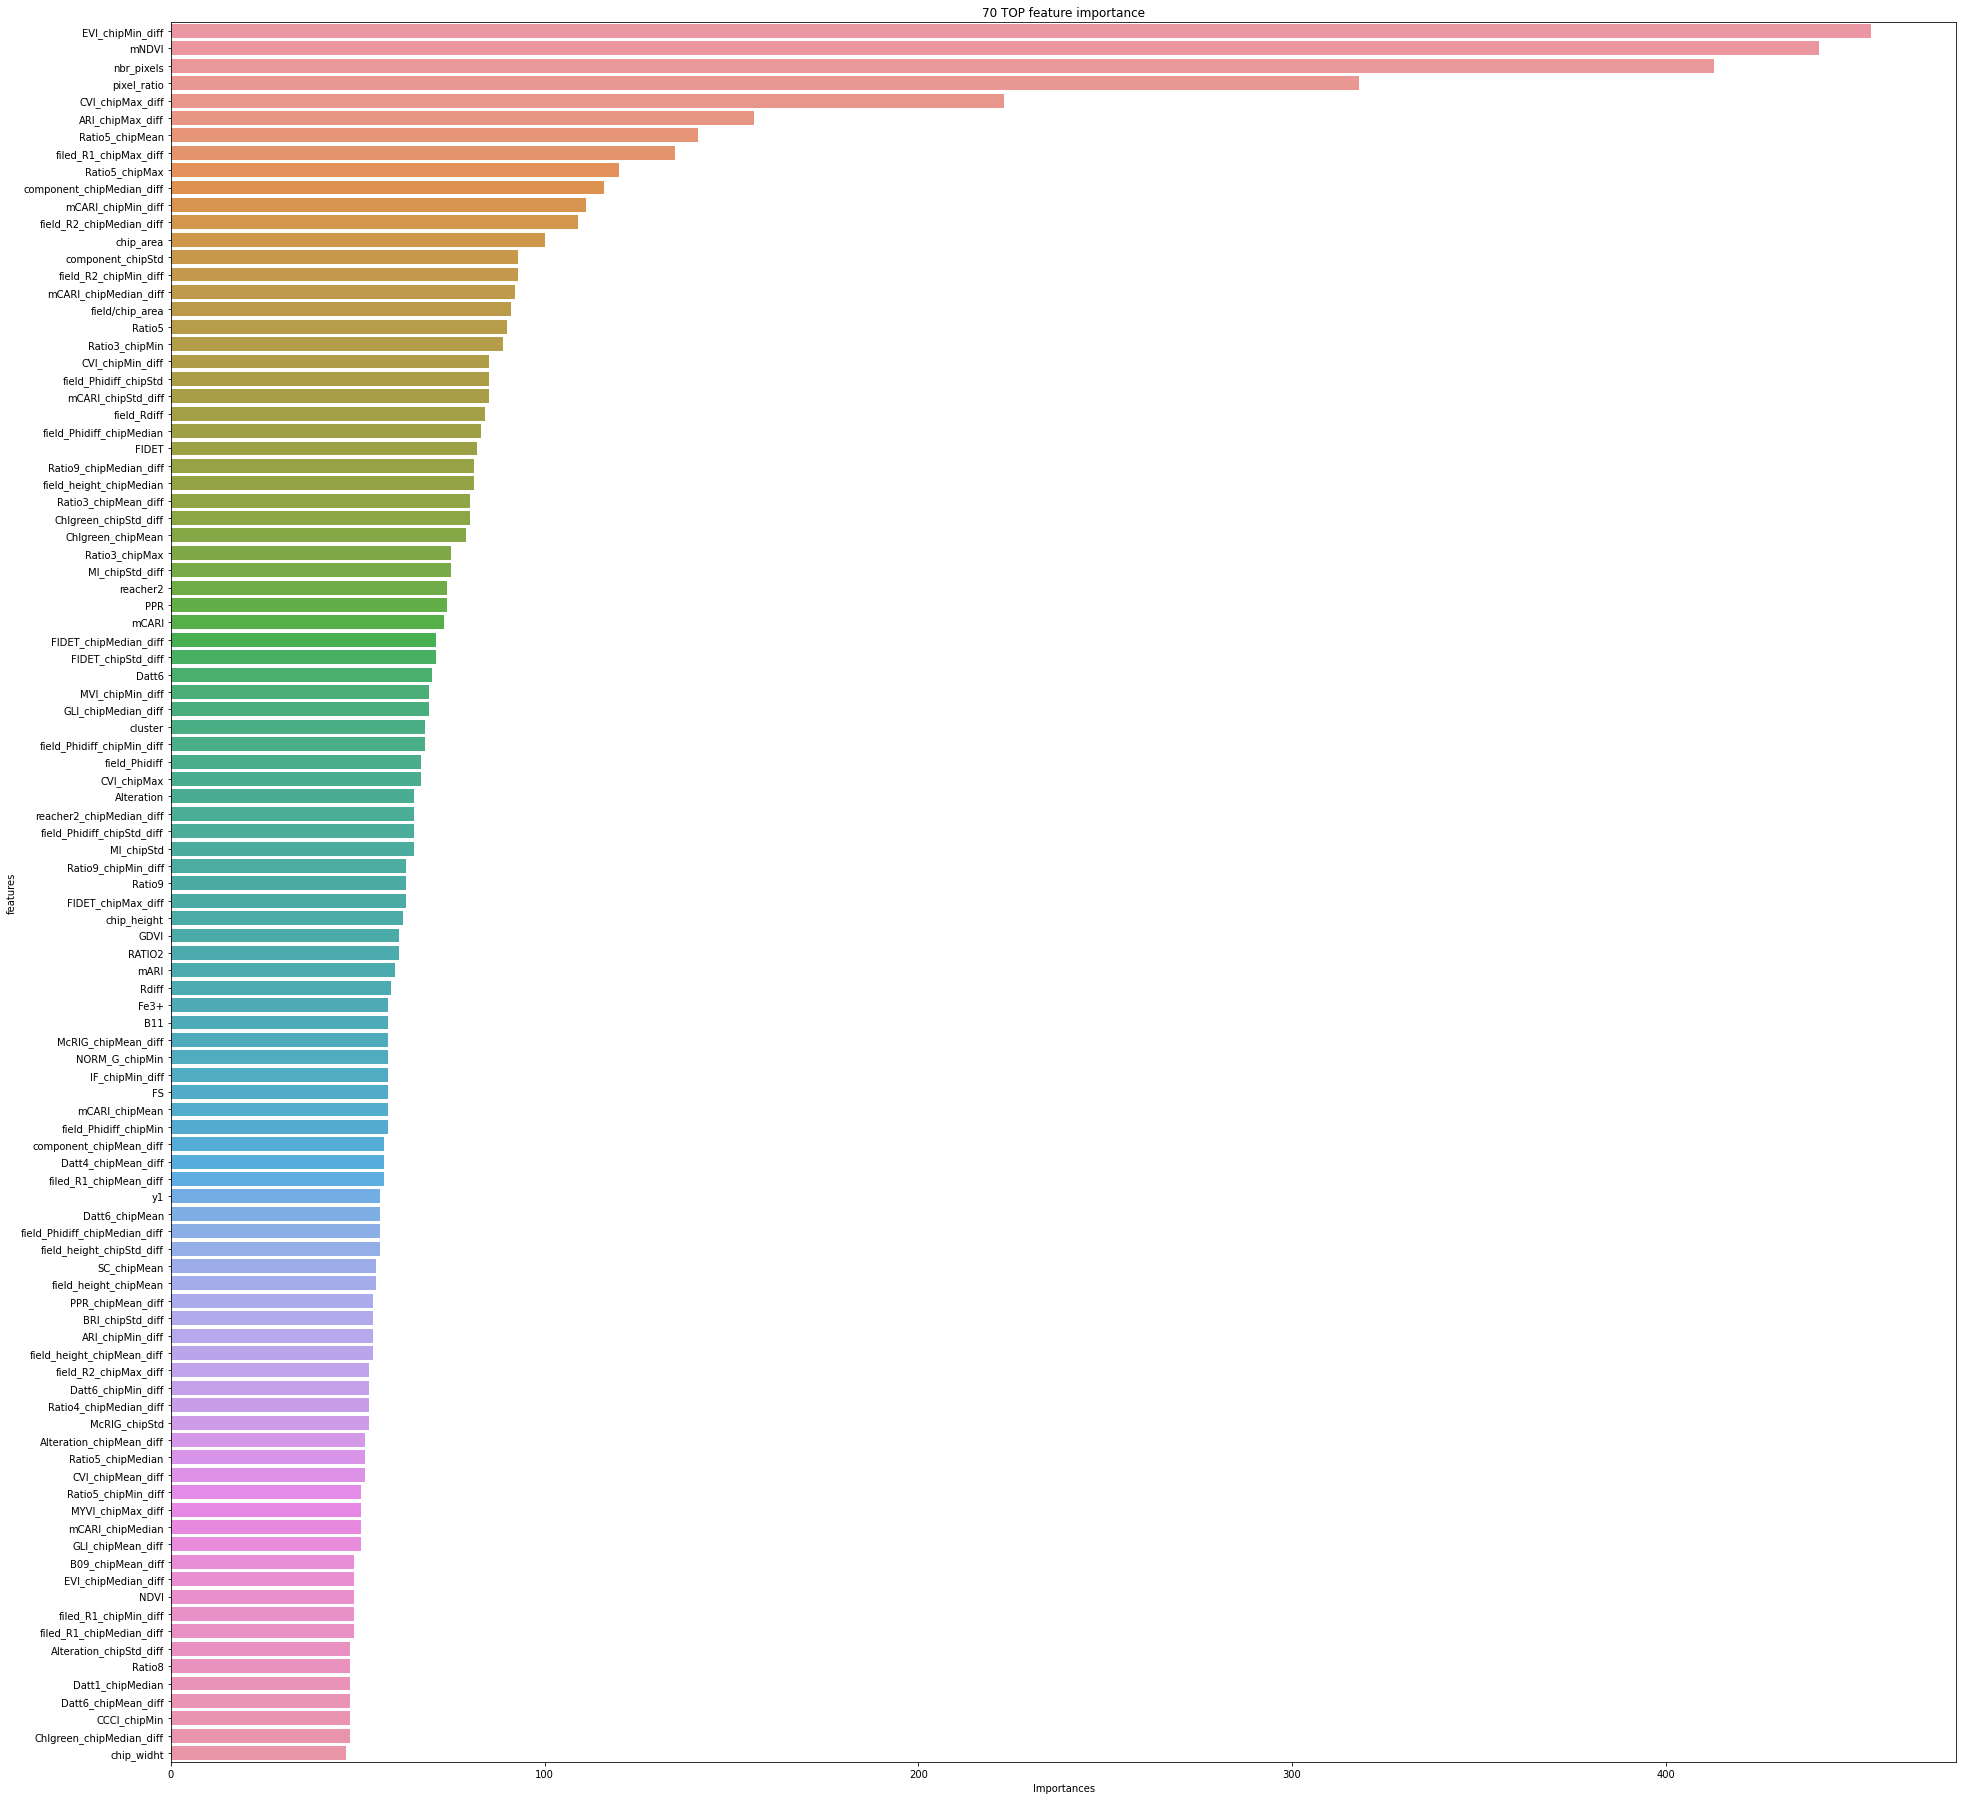

In [ ]:
feats = pd.DataFrame({'features': X.columns}) 
feats['Importances']=model.feature_importances_
plt.figure(figsize=(32, 32))
sns.barplot(data=feats.sort_values(by='Importances', ascending=False).head(100), x='Importances', y='features');
plt.title('70 TOP feature importance');

In [ ]:
d={0: 'Wheat',
 1: 'Mustard',
 2: 'Lentil',
 3: 'No Crop',
 4: 'Sugarcane',
 5: 'Garlic',
 6: 'Potato',
 7: 'Green pea',
 8: 'Bersem',
 9: 'Coriander',
 10: 'Gram',
 11: 'Maize',
 12: 'Rice'}

In [ ]:
submission = pd.read_csv('SampleSubmission.csv')
submission

,Field ID,Wheat,Mustard,Lentil,No Crop,Green pea,Sugarcane,Garlic,Maize,Gram,Coriander,Potato,Bersem,Rice
0,11,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,7319,0,0,0,0,0,0,0,0,0,0,0,0,0
1526,7325,0,0,0,0,0,0,0,0,0,0,0,0,0
1527,7329,0,0,0,0,0,0,0,0,0,0,0,0,0
1528,7330,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_prediction =np.mean(predictions,0) #model.predict_proba(test[cols])

sub = pd.DataFrame(test_prediction)
sub = sub.rename(columns=d)
sub['Field ID'] =  test['field_id'].values
submission = pd.merge(sub[['Field ID']],submission,on='Field ID',how='left')

for col in submission.columns[1:] :
  submission[col] = sub[col]
  
submission.head()

,Field ID,Wheat,Mustard,Lentil,No Crop,Green pea,Sugarcane,Garlic,Maize,Gram,Coriander,Potato,Bersem,Rice
0,11,0.121670,0.103810,0.019056,0.057620,0.014405,0.620043,0.007191,0.009241,0.004276,0.005785,0.023097,0.008038,0.005770
1,1434,0.110078,0.078949,0.016648,0.122103,0.012568,0.582992,0.006407,0.015228,0.004142,0.008186,0.020769,0.015281,0.006650
2,1438,0.031057,0.044871,0.013978,0.065667,0.007429,0.694575,0.005280,0.081282,0.003421,0.003634,0.018615,0.024951,0.005241
3,13,0.610395,0.150524,0.013583,0.108671,0.022071,0.035045,0.009621,0.009938,0.007502,0.009864,0.006755,0.010810,0.005222
4,19,0.215034,0.211102,0.325839,0.055690,0.024343,0.107488,0.010835,0.013381,0.007148,0.007609,0.007330,0.007908,0.006293


In [ ]:
submission.to_csv('Top.csv',index=False)